## Quantum Representations of Audio

This notebooks goes through Quantum Representations of Audio both with Visual and Audio Examples.<br> 

The Quantum Audio package provides core functionalities for:
- **encoding** - circuit preparation given a digital audio array
- **decoding** - reconstructing of audio given a quantum circuit

This can be done through different types of schemes. As of ```v0.1.0``` support for Mult-channel schemes is included.

### Table of Contents
1. [Installation](#installation)
2. [Examples with Signals](#signal-examples)
   - [Loading Signals](#signal-examples)
   - [Single-Channel Quantum Audio Scheme](#single-channel)
       - [Compare Result](#single-channel)
       - [Interaction with Shots](#single-channel)
   - [Multi-Channel Quantum Audio Scheme](#multi-channel)
       - [Compare Result](#multi-channel)
3. [Examples with Audio](#audio)
   - [Loading Audio](#audio)
   - [Interaction with Shots](#audio)
4. [References](#references)
5. [Appendix](#appendix)

### 1. Installation <a id="installation"></a>

**Note**: 
It is recommended to use an environment for the following ```pip``` commands to avoid dependency conflicts.
For creating environments and using them with this notebook, please refer [Appendix](#appendix).

In [ ]:
#!pip install quantumaudio[all] 

In [ ]:
# beta version
#!pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple/ "quantumaudiopackage==0.1.0b1[all]"

In [1]:
import quantumaudio

In [2]:
signal = quantumaudio.tools.test_signal(1,8)

In [3]:
for scheme in ['qpam','sqpam','qsm','mqsm','msqpam']:
    try:
        quantumaudio.load_scheme(scheme,num_channels=3)
    except Exception as e:
        print(e)

QPAM.__init__() got an unexpected keyword argument 'num_channels'
SQPAM.__init__() got an unexpected keyword argument 'num_channels'
QSM.__init__() got an unexpected keyword argument 'num_channels'
Multi-channel Quantum State Modulation
Multi-channel Single-Qubit Probability Amplitude Modulation


Quantum Probability Amplitude Modulation
Quantum Probability Amplitude Modulation


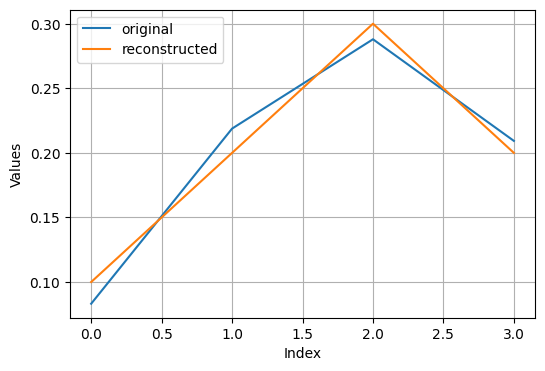

In [4]:
x = quantumaudio.decode(quantumaudio.encode([0.1,0.2,0.3,0.2],scheme='qpam',verbose=0))
quantumaudio.tools.plot([x,[0.1,0.2,0.3,0.2]])

In [5]:
import numpy as np

Quantum Probability Amplitude Modulation
Quantum Probability Amplitude Modulation


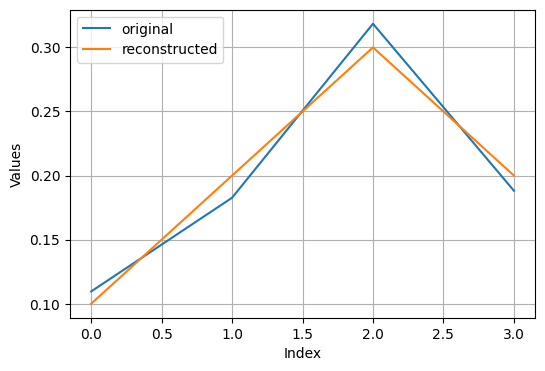

Single-Qubit Probability Amplitude Modulation
Single-Qubit Probability Amplitude Modulation


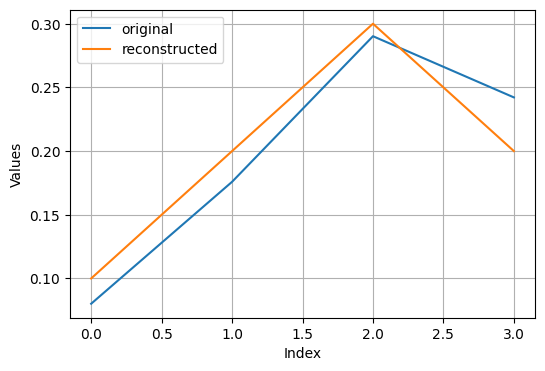

Quantum State Modulation
Quantum State Modulation


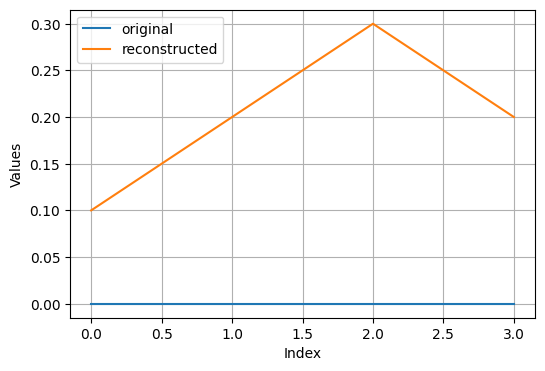

Multi-channel Quantum State Modulation
Multi-channel Quantum State Modulation


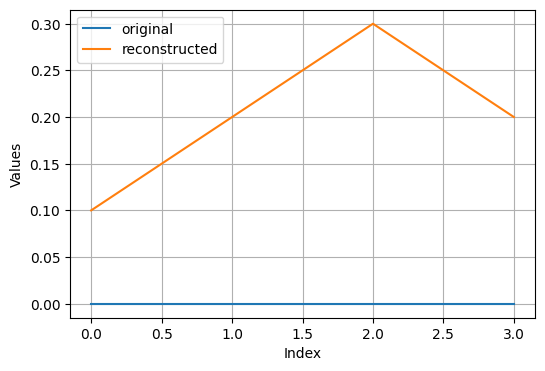

Multi-channel Single-Qubit Probability Amplitude Modulation
Multi-channel Single-Qubit Probability Amplitude Modulation


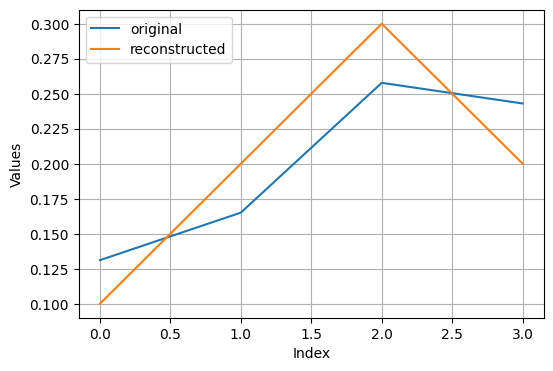

In [6]:
for scheme in ['qpam','sqpam','qsm','mqsm','msqpam']:
    try:
        #api.encode(signal,scheme=scheme,verbose=0)
        x = quantumaudio.decode(quantumaudio.encode([0.1,0.2,0.3,0.2],scheme=scheme,verbose=0))
        quantumaudio.tools.plot([x,np.array([0.1,0.2,0.3,0.2])])
    except Exception as e:
        print(e)

In [7]:
circuit = quantumaudio.encode(signal,scheme='mqsm',verbose=0)

Multi-channel Quantum State Modulation


In [8]:
result = quantumaudio.utils.execute(circuit)
counts, metadata = quantumaudio.utils.get_counts_and_metadata(result)

In [10]:
quantumaudio.tools.plot([quantumaudio.decode(circuit),quantumaudio.decode_result(result, metadata),quantumaudio.decode_counts(counts, metadata)])

Multi-channel Quantum State Modulation


TypeError: decode_result() takes 1 positional argument but 2 were given

### 2. Examples with Signals <a id="signal-examples"></a>

#### Loading Signals

Digitial Audio contains many thousands of samples each second. The samples can be obtained in Python using libraries of choice such as soundfile, librosa, etc. <br>
For the purpose of visualization, the examples provided in this section uses synthetic signals with shorter number of samples.

In [ ]:
import quantumaudio

In [ ]:
from quantumaudio.tools import test_signal, plot

In [ ]:
signal = test_signal(1,8)
stereo_signal = test_signal(2,8)

In [ ]:
plot(signal)

In [ ]:
plot(stereo_signal)

#### Single-Channel Quantum Audio Scheme <a id="single-channel"></a>

The following schemes included in the package can be used to encode a 1-Dimensional Signal:
- QPAM   : Quantum Probability Amplitude Modulation
- SQPAM  : Single-Qubit Probability Amplitude Modulation
- QSM    : Quantum State Modulation

In [ ]:
scheme = quantumaudio.load_scheme('qsm') # Replace SQPAM with QSM or QPAM to try them out.

In [ ]:
encoded_circuit = scheme.encode(signal,verbose=2) # verbose value 1 provides text information, 2 provides text with circuit (default). Turn off by setting it to 0.

In [ ]:
decoded_signal = scheme.decode(encoded_circuit)

#### Compare Result

In [ ]:
plot([signal,decoded_signal])

#### Interaction with Shots

Since a measurement in Quantum computing is probabilistic, it has to be repeated with N number of times (Shots) to get the probability distribution of the Quantum States of a given circuit. This section provides visualization of reconstructing a signal with respect to the number of shots.

In [ ]:
from tools import interactive

In [ ]:
interactive.tune(encoded_circuit,function=scheme.decode,step=2,max_value=4000,ref=signal)

#### Multi-Channel Quantum Audio Scheme <a id="multi-channel"></a>

The following schemes included in the package can be used to encode a 1-Dimensional Signal:
- MSQPAM : Multi-channel Single-Qubit Probability Amplitude Modulation
- MQSM   : Multi-channel Quantum State Modulation

In [ ]:
multi_channel_scheme = quantumaudio.MQSM() # a multi-channel quantum audio scheme. Replace 'mqsm' with 'msqpam' to try it out.

In [ ]:
encoded_circuit = multi_channel_scheme.encode(stereo_signal,verbose=2) # verbose value 1 provides text information, 2 provides text with circuit (default). Turn off by setting it to 0.

In [ ]:
decoded_stereo_signal = multi_channel_scheme.decode(encoded_circuit)

#### Compare Result

In [ ]:
plot([stereo_signal,decoded_stereo_signal])

### 3) Examples with Audio <a id="audio"></a>

#### Loading Audio

The module ```audio``` contains I/O handling of digital audio using libraries librosa and soundfile. The module ```stream``` enables batch processing to efficiently process long audio files without increasing the ciruit depth.  

In [ ]:
from tools import audio, stream

In [ ]:
path = 'media/audio_example.mp3'

In [ ]:
interactive.play(audio.read(path)[0],rate=22050) # preview original audio

#### Reconstruct Quantum Audio

In [ ]:
qpam = quantumaudio.QPAM()

In [ ]:
y,sr = audio.get_quantumaudio(path,scheme=qpam,shots=8000,mono=True)

In [ ]:
interactive.play(y,rate=sr) # Play reconstructed audio

In [ ]:
#audio.write(y,sr=22050) # Export audio

In [ ]:
#audio.save_quantumaudio(path,scheme=qpam) # Directly export from a path

#### Interaction with Shots

This section provides listening to Audio Output as it reconstructs from Quantum Audio Representation with respect to the number of shots.

In [ ]:
audio_chunks = stream.get_chunks(audio.read(path)[0])

In [ ]:
interactive.tune_audio(audio_chunks,scheme=qpam,function=stream.process_chunks)

### References <a id="references"></a>

- Itaboraí, P.V., Miranda, E.R. (2022). Quantum Representations of Sound: From Mechanical Waves to Quantum Circuits. In: Miranda, E.R. (eds) Quantum Computer Music. Springer, Cham. https://doi.org/10.1007/978-3-031-13909-3_10
    
- Itaboraí, P. V. (2023) Towards Quantum Computing for Audio and Music Expression. Thesis. University of Plymouth. Available at: https://doi.org/10.24382/5119

### Appendix <a id="appendix"></a>

#### Using Environment with Notebook

The environment can be used with notebook using the following steps:

- activate the environment in terminal
- do ```pip install ipykernel``` (can be skipped as it is already included in ```pip install quantumaudio[notebook]```)
- do ```python -m ipykernel install --user --name=kernel_name```
- In the top menu bar, go to **Kernel** and choose **Change Kernel**. Select the newly created kernel_name.  